This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'API-KEY'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests
import pandas as pd
import collections 
import json
import matplotlib.pyplot as plt
# Import "mplfinance" to plot candlestick graphs, based on based on open, high, low and closing prices of a security:
import mplfinance as fplt
import os
from sb_utils import save_file

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [4]:
# Keeping the default settings and only changing the width of the current notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
url = "https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2020-11-06&end_date=2020-11-06&api_key=[API-Key]"

In [6]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
r = requests.get(url)

print(r.ok)

True


In [7]:
print(r.text)

{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (2020-08-31) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE0005313704","refreshed_at":"2020-11-23T22:16:21.223Z","newest_available_date":"2020-11-06","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2020-11-06","end_date":"2020-11-06","data":[["2020-11-06",115.2,115.8,114.8,115.1,null,190.0,21831.0,null,null,null]],"collapse":null,"order":null,"database_id":6129}}


In [8]:
# Decode the JSON data into a dictionary: 
r.json()

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-08-31) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-11-23T22:16:21.223Z',
  'newest_available_date': '2020-11-06',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2020-11-06',
  'end_date': '2020-11-06',
  'data': [['2020-11-06',
    115.2,
    115.8,
    114.8,
    115.1,
    None,
    190.0,
    21831.0,
    None,
    None,
    None]],
  'collapse': None,
  'order': None,
  'database_id': 6129}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [9]:
# Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017:
#(keep in mind that the date format is YYYY-MM-DD).
url_2017 = "https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key=yz4fsVAsedU1dtyxzu8P"
r_2017 = requests.get(url_2017)
print(r_2017.ok)

True


In [10]:
print(type(r_2017))

<class 'requests.models.Response'>


In [11]:
# Convert the returned JSON object into a Python dictionary:
json_data_2017 = r_2017.json()
print(type(json_data_2017))

<class 'dict'>


In [12]:
# Explore key-value pairs @ json_data_2017 dict:
for k in json_data_2017.keys():
    print(k + ': ', json_data_2017[k])

dataset:  {'id': 10095370, 'dataset_code': 'AFX_X', 'database_code': 'FSE', 'name': 'Carl Zeiss Meditec (AFX_X)', 'description': 'Stock Prices for Carl Zeiss Meditec (2020-08-31) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 'refreshed_at': '2020-11-23T22:16:21.223Z', 'newest_available_date': '2020-11-06', 'oldest_available_date': '2000-06-07', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2017-01-01', 'end_date': '2017-12-31', 'data': [['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None], ['2017-12-28', 51.65, 51.82, 51.43, 51.6, None, 40660.0, 2099024.0, None, None, None], ['2017-12-27', 51.45, 51.89, 50.76, 51.82, None, 57452.0, 2957018.0, None, None, None], 

In [13]:
# Review the main keys interested on in the dict I:
json_data_2017['dataset']['column_names']

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Change',
 'Traded Volume',
 'Turnover',
 'Last Price of the Day',
 'Daily Traded Units',
 'Daily Turnover']

In [14]:
# Review the main keys interested on in the dict II:
json_data_2017['dataset']['data']

[['2017-12-29',
  51.76,
  51.94,
  51.45,
  51.76,
  None,
  34640.0,
  1792304.0,
  None,
  None,
  None],
 ['2017-12-28',
  51.65,
  51.82,
  51.43,
  51.6,
  None,
  40660.0,
  2099024.0,
  None,
  None,
  None],
 ['2017-12-27',
  51.45,
  51.89,
  50.76,
  51.82,
  None,
  57452.0,
  2957018.0,
  None,
  None,
  None],
 ['2017-12-22',
  51.05,
  51.5,
  50.92,
  51.32,
  None,
  71165.0,
  3641949.0,
  None,
  None,
  None],
 ['2017-12-21',
  51.16,
  51.52,
  50.9,
  51.4,
  None,
  120649.0,
  6179433.0,
  None,
  None,
  None],
 ['2017-12-20',
  51.88,
  52.04,
  51.2,
  51.27,
  None,
  50587.0,
  2610258.0,
  None,
  None,
  None],
 ['2017-12-19',
  52.73,
  52.73,
  51.07,
  51.66,
  None,
  137313.0,
  7102361.0,
  None,
  None,
  None],
 ['2017-12-18',
  52.37,
  52.75,
  51.61,
  52.62,
  None,
  129733.0,
  6770499.0,
  None,
  None,
  None],
 ['2017-12-15',
  52.7,
  52.7,
  51.64,
  52.01,
  None,
  204080.0,
  10596319.0,
  None,
  None,
  None],
 ['2017-12-14',
  53.

In [15]:
# Convert json_data_2017['dataset']['data'] dict to a DataFrame: 
df = pd.DataFrame(json_data_2017['dataset']['data'])

In [16]:
df.shape

(255, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       255 non-null    object 
 1   1       252 non-null    float64
 2   2       255 non-null    float64
 3   3       255 non-null    float64
 4   4       255 non-null    float64
 5   5       1 non-null      float64
 6   6       255 non-null    float64
 7   7       255 non-null    float64
 8   8       0 non-null      object 
 9   9       0 non-null      object 
 10  10      0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 22.0+ KB


In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0,None,None,None
1,2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0,None,None,None
2,2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0,None,None,None
3,2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0,None,None,None
4,2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0,None,None,None


In [19]:
# give the columns names based on json_data_2017['dataset']['column_names']:
df.columns = ['Date', 'Open','High','Low','Close','Change','Traded Volume','Turnover','Last Price of the Day','Daily Traded Units','Daily Turnover']
df.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0,None,None,None
1,2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0,None,None,None
2,2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0,None,None,None
3,2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0,None,None,None
4,2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0,None,None,None


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   255 non-null    object 
 1   Open                   252 non-null    float64
 2   High                   255 non-null    float64
 3   Low                    255 non-null    float64
 4   Close                  255 non-null    float64
 5   Change                 1 non-null      float64
 6   Traded Volume          255 non-null    float64
 7   Turnover               255 non-null    float64
 8   Last Price of the Day  0 non-null      object 
 9   Daily Traded Units     0 non-null      object 
 10  Daily Turnover         0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 22.0+ KB


In [21]:
# assign 'Date' as df index:
df = df.set_index('Date')

In [22]:
df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0,None,None,None
2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0,None,None,None
2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0,None,None,None
2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0,None,None,None
2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0,None,None,None


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 2017-12-29 to 2017-01-02
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   252 non-null    float64
 1   High                   255 non-null    float64
 2   Low                    255 non-null    float64
 3   Close                  255 non-null    float64
 4   Change                 1 non-null      float64
 5   Traded Volume          255 non-null    float64
 6   Turnover               255 non-null    float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         0 non-null      object 
dtypes: float64(7), object(3)
memory usage: 21.9+ KB


In [24]:
# let's keep the only relevent columns so we can answer the main questions: 
names_list = ['Change', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
#Non_Main_Cols = df_new[names_list]
df.drop(columns=names_list, inplace=True)
df

,Open,High,Low,Close,Traded Volume
Date,,,,,
2017-12-29,51.76,51.94,51.45,51.76,34640.0
2017-12-28,51.65,51.82,51.43,51.60,40660.0
2017-12-27,51.45,51.89,50.76,51.82,57452.0
2017-12-22,51.05,51.50,50.92,51.32,71165.0
2017-12-21,51.16,51.52,50.90,51.40,120649.0
...,...,...,...,...,...
2017-01-06,34.91,35.21,34.91,35.04,27507.0
2017-01-05,35.02,35.20,34.73,35.06,48412.0
2017-01-04,35.48,35.51,34.75,35.19,54408.0


In [25]:
df.head()

,Open,High,Low,Close,Traded Volume
Date,,,,,
2017-12-29,51.76,51.94,51.45,51.76,34640.0
2017-12-28,51.65,51.82,51.43,51.60,40660.0
2017-12-27,51.45,51.89,50.76,51.82,57452.0
2017-12-22,51.05,51.50,50.92,51.32,71165.0
2017-12-21,51.16,51.52,50.90,51.40,120649.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 2017-12-29 to 2017-01-02
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           252 non-null    float64
 1   High           255 non-null    float64
 2   Low            255 non-null    float64
 3   Close          255 non-null    float64
 4   Traded Volume  255 non-null    float64
dtypes: float64(5)
memory usage: 12.0+ KB


In [27]:
# let's sort the data:
df = df.sort_index(ascending=True)

In [28]:
df.head()

,Open,High,Low,Close,Traded Volume
Date,,,,,
2017-01-02,34.99,35.94,34.99,35.80,44700.0
2017-01-03,35.90,35.93,35.34,35.48,70618.0
2017-01-04,35.48,35.51,34.75,35.19,54408.0
2017-01-05,35.02,35.20,34.73,35.06,48412.0
2017-01-06,34.91,35.21,34.91,35.04,27507.0


In [29]:
# Converting the index to DatetimeIndex:
df.index = pd.to_datetime(df.index)

In [30]:
#Calculate what the highest opening prices were for the stock in this period:
# let's use .resample() for 2017 and apply .max() method:
df_open_max = df['Open'].resample('A').max()
df_open_max

Date
2017-12-31    53.11
Freq: A-DEC, Name: Open, dtype: float64

In [31]:
#Calculate what the highest and lowest opening prices were for the stock in this period:
# let's use .resample() for 2017 and apply .min() method:
df_open_min = df['Open'].resample('A').min()
df_open_min

Date
2017-12-31    34.0
Freq: A-DEC, Name: Open, dtype: float64

In [32]:
# Calaculate the average daily trading volume during this year:
# let's use .resample() for 2017 and apply .mean() method:
df_Volume_mean  = df['Traded Volume'].resample('A').mean()
round(df_Volume_mean, 2)

Date
2017-12-31    89124.34
Freq: A-DEC, Name: Traded Volume, dtype: float64

In [33]:
# Calculate the median trading volume during this year:
# let's use .resample() for 2017 and apply .median() method:
df_Volume_median  = df['Traded Volume'].resample('A').median()
df_Volume_median 

Date
2017-12-31    76286.0
Freq: A-DEC, Name: Traded Volume, dtype: float64

In [34]:
# create a new column 'high_low' showing the difference between 'High' & 'Low' for any given day:
df['high_low'] = df['High'] - df['Low']
df.head()

,Open,High,Low,Close,Traded Volume,high_low
Date,,,,,,
2017-01-02,34.99,35.94,34.99,35.80,44700.0,0.95
2017-01-03,35.90,35.93,35.34,35.48,70618.0,0.59
2017-01-04,35.48,35.51,34.75,35.19,54408.0,0.76
2017-01-05,35.02,35.20,34.73,35.06,48412.0,0.47
2017-01-06,34.91,35.21,34.91,35.04,27507.0,0.30


In [35]:
# Calculate the largest change in any one day (based on High and Low price):
# let's use .resample() for 2017 and apply .max() method:
df_high_low = df['high_low'].resample('A').max()
df_high_low

Date
2017-12-31    2.81
Freq: A-DEC, Name: high_low, dtype: float64

In [36]:
# let's sort the data descending:
df = df.sort_index(ascending=True)

In [37]:
# Calculate the largest change between any two days (based on Closing Price) (when the date is sorted ascending):

largest_change = (max((df.Close - df.Close.shift()).dropna()))
print(f"The largest day to day stock fluctation is {largest_change:.3}" + " when the Date is ascending!!")

The largest day to day stock fluctation is 1.72 when the Date is ascending!!


In [38]:
# let's sort the data descending:
df = df.sort_index(ascending=False)

In [39]:
# Calculate the largest change between any two days (based on Closing Price) (when the date is sorted descending):

largest_change = (max((df.Close - df.Close.shift()).dropna()))
largest_change
print(f"The largest day to day stock fluctation is {largest_change:.3}" + " when the Date is descending!!")

The largest day to day stock fluctation is 2.56 when the Date is descending!!


In [40]:
#let's print the list of the styles available:
fplt.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [41]:
# let's sort the data descending:
df = df.sort_index(ascending=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2017-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           252 non-null    float64
 1   High           255 non-null    float64
 2   Low            255 non-null    float64
 3   Close          255 non-null    float64
 4   Traded Volume  255 non-null    float64
 5   high_low       255 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


In [43]:
# let's remove all the NANs so we can be able to plot the Candlestick Chart for Carl Zeiss 2017 stock price:
df_plot = df.dropna(how='any')

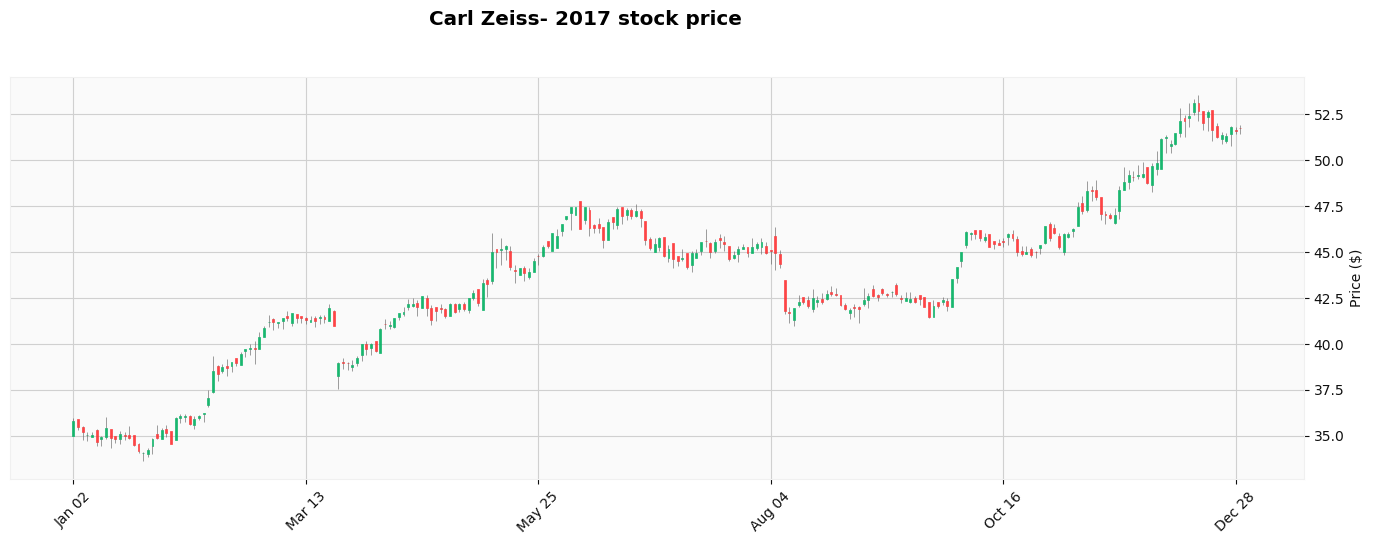

In [44]:
# plot the Candlestick Chart for Carl Zeiss 2017 stock price:

fplt.plot(
        df_plot,
        type="candle",
        style='yahoo',
        title='Carl Zeiss- 2017 stock price',
        ylabel='Price ($)',
        figratio=(25,8),
    )

In [45]:
# save the state_summary separately.
datapath = 'C:/Users/aktha/Desktop/Future/GOALLLLL/DataScienceGuidedCapstone/data'
save_file(df_plot, 'carl_zeiss_2017.csv', datapath)

Writing file.  "C:/Users/aktha/Desktop/Future/GOALLLLL/DataScienceGuidedCapstone/data\carl_zeiss_2017.csv"
